# Temperature Prediction

Build a simple linear regression model which predicts temperature based on daily records of it.


## Data

Daily Climate time series data given on [Kaggle](https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data).

## Libraries and loading data

In [146]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


temperature = pd.read_csv("DailyDelhiClimate.csv")
temperature     


,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [147]:
temperature.shape       # (rows, columns)

(114, 5)

In [148]:
# checking for missing values if any
print(temperature.isnull().sum())


date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


Hopefully, there is none. 


## Outliers 

Outliers are data points that significantly deviate from the rest of the data in the dataset. 

They can skew the results of the analysis and need to be identified and, treated appropriately. 



{'whiskers': [<matplotlib.lines.Line2D at 0x2a45047c6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a44e1134c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a45047ca60>],
 'medians': [<matplotlib.lines.Line2D at 0x2a450389580>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a450389730>],
 'means': []}

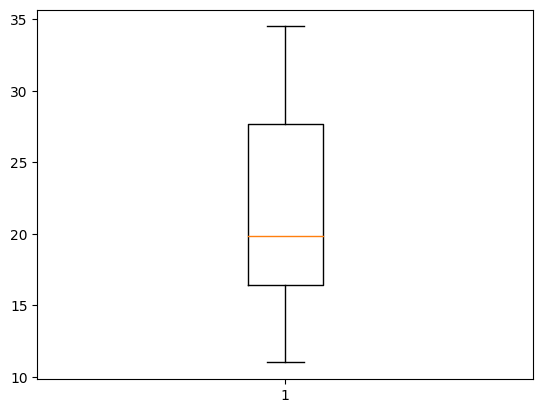

In [149]:
# A boxplot visually displays the distribution of the data and identifies outliers as individual points beyond the whiskers
plt.boxplot(temperature['meantemp'])  # target variable(or dependent variable)


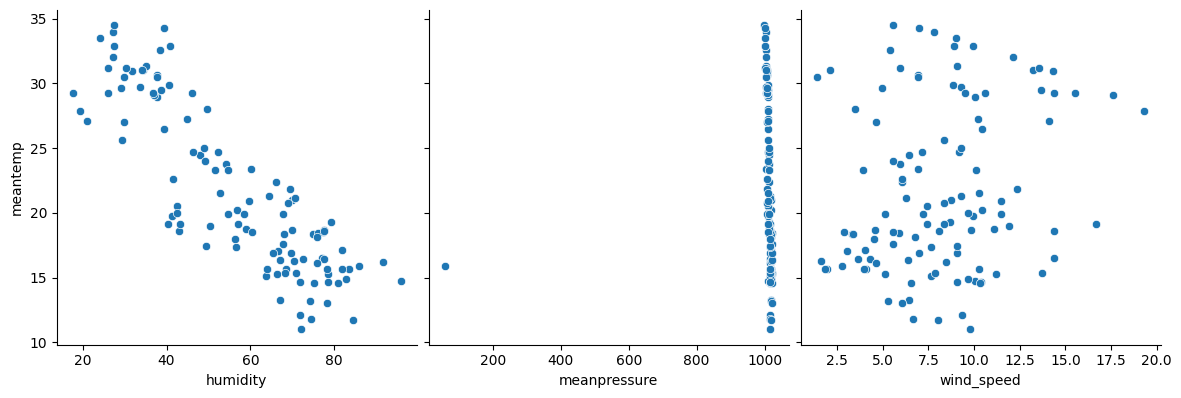

In [150]:

# visualising data
sns.pairplot(temperature, x_vars=['humidity', 'meanpressure', 'wind_speed'], y_vars='meantemp', height=4, aspect=1, kind='scatter')
plt.show()


## Correlation matrix

It provides a summary of the relationships between variables in a dataset by displaying the correlation coefficients between them. 

The correlation coefficient(r) ranges from -1 to 1, where:

* r=1: Perfect positive correlation(as one variable increases, the other increases).

* r=−1: Perfect negative correlation(while one variable increases, the other decreases).

* r=0: No correlation (variables are independent of each other).


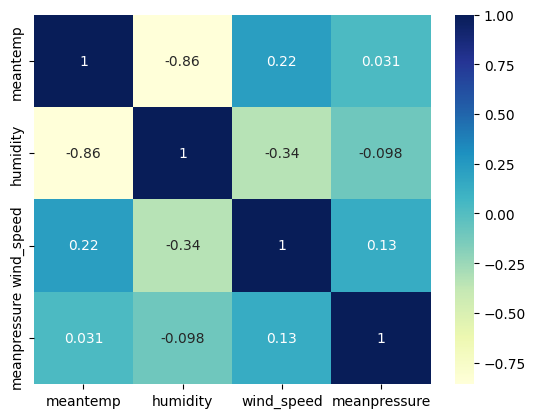

In [151]:
# checking the correlation between variables
sns.heatmap(temperature.corr(), cmap="YlGnBu", annot = True)
plt.show()


We can see "humidity" have a strong relationship with "meantemp" compared to other variables. So, it will be our feature variable. 

In [152]:

X = temperature['humidity']     # the feature variable, humidity
y = temperature['meantemp']     # the response variable, meantemp

# splitting data into training and testing sets; keeping 70% in train 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print("X_train shape:", X_train.shape) 
print("X_test shape:", X_test.shape) 
print("y_train shape:", y_train.shape) 
print("y_test shape:", y_test.shape) 


X_train shape: (79,)
X_test shape: (35,)
y_train shape: (79,)
y_test shape: (35,)


To fit the model, the input data should be a two-dimensional array, where each row represents a sample and each column represents a feature. So, reshaping it:


In [153]:

X_train = np.array(X_train)
X_test = np.array(X_test)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

print("X_train shape:", X_train.shape) 
print("X_test shape:", X_test.shape) 
print("y_train shape:", y_train.shape) 
print("y_test shape:", y_test.shape) 

X_train shape: (79, 1)
X_test shape: (35, 1)
y_train shape: (79,)
y_test shape: (35,)


## Building Model


In [154]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()     # create a linear regression model

model = linreg.fit(X_train, y_train)     # train the model on the train set

print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

Intercept:  36.87949628338074
Coefficient:  [-0.26885967]


## Making Predictions

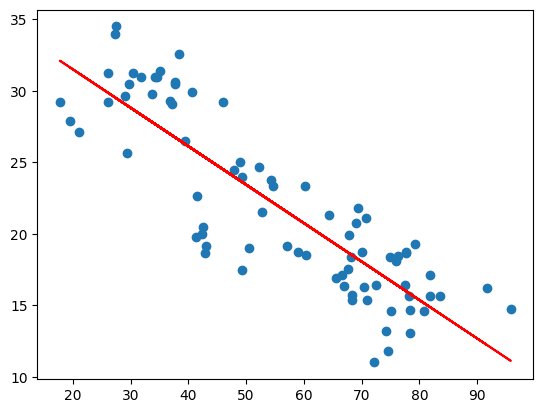

In [155]:
# predictions on test set
y_pred = model.predict(X_test)

# showing data and fitted line together 
plt.scatter(X_train, y_train)
plt.plot(X_train, model.intercept_ + model.coef_*X_train, 'r')
plt.show()



In [156]:

# Create a DataFrame from the arrays
df = pd.DataFrame({"Actual value": y_test, "Predicted Value": y_pred})
df


,Actual value,Predicted Value
0,15.913043,13.792634
108,33.500000,30.393257
26,16.500000,16.166099
12,13.235294,18.850083
113,32.000000,29.581877
96,27.000000,28.847314
46,20.250000,21.621710
75,20.900000,20.828574
110,34.250000,26.293147
40,14.666667,17.581347


## Performance metrics

* mean squared error(mse): measures the average squared difference between the actual and predicted values. Lower values indicate better performance.

* root mean squared error(rmse): represents the square root of the "mse".

* mean absolute error(mae): provides a measure of the average magnitude of the errors. Lower values indicate better performance.

* r-squared(r2): represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
Ranges from 0 to 1, where 1 indicates a perfect fit and 0 indicates no linear relationship between the variables.

* mean absolute percentage error(mape): provides a measure of the accuracy of the model's predictions on a percentage scale. Lower values indicate better performance.

* max error: provides insight into the worst-case performance of the model.

In [157]:

from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, max_error

mse = mean_squared_error(y_test, y_pred)

print(f"mse: {mse:.3f}")
print(f"rmse: {np.sqrt(mse):.3f}")
print(f"mae: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"r-squared: {r2_score(y_test, y_pred):.3f}")
print(f"mape: %{100*mean_absolute_percentage_error(y_test, y_pred):.3f}")
print(f"max error: {max_error(y_test, y_pred):.3f}")



mse: 12.299
rmse: 3.507
mae: 2.874
r-squared: 0.725
mape: %14.586
max error: 7.957


## Conclusion

In summary, the performance metrics suggest that the model's fit to the data might not be optimal. The mse, rmse, and mape values imply discrepancies in the predictions, while the r-squared value indicates that the model might not fully account for the variability in the data. Further examination and potential adjustments to the model may be required to enhance its predictive performance.
